# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 119
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4


KeyboardInterrupt: 

In [9]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Very good flight following an ...
1,Not Verified | An hour's delay due to late ar...
2,✅ Trip Verified | I booked through BA becaus...
3,✅ Trip Verified | British airways lost bags ...
4,✅ Trip Verified | The check in process and rew...


In [10]:
df.to_csv("/Users/muhammadjon/Desktop/data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [14]:
df = pd.read_csv("/Users/muhammadjon/Desktop/data/BA_reviews.csv")
df.head()

,Unnamed: 0,reviews
0,0,Not Verified | Very good flight following an ...
1,1,Not Verified | An hour's delay due to late ar...
2,2,✅ Trip Verified | I booked through BA becaus...
3,3,✅ Trip Verified | British airways lost bags ...
4,4,✅ Trip Verified | The check in process and rew...


In [15]:
import re

# Clean the data using regular expressions
def clean_text(text):
    if pd.isna(text):  
        return text
    # Remove 'Trip Verified' and 'Not Verified' (with or without the checkmark)
    text = re.sub(r"✅?\s*(Trip Verified|Not Verified)", "", text)
    return text.strip() 

# Apply the function to the 'reviews' column
df["reviews"] = df["reviews"].apply(clean_text)

# Display cleaned data
df.head()


,Unnamed: 0,reviews
0,0,| Very good flight following an equally good ...
1,1,| An hour's delay due to late arrival of the ...
2,2,| I booked through BA because Loganair don’t...
3,3,| British airways lost bags in LHR then foun...
4,4,| The check in process and reward/loyalty prog...


In [16]:
# Drop rows where 'reviews' column is empty or NaN
df = df.dropna(subset=["reviews"])

# Reset index after removal
df = df.reset_index(drop=True)

df.head()


,Unnamed: 0,reviews
0,0,| Very good flight following an equally good ...
1,1,| An hour's delay due to late arrival of the ...
2,2,| I booked through BA because Loganair don’t...
3,3,| British airways lost bags in LHR then foun...
4,4,| The check in process and reward/loyalty prog...


In [17]:
# Remove duplicate reviews
df = df.drop_duplicates(subset=["reviews"], keep="first")

# Reset index again
df = df.reset_index(drop=True)

# Display the dataset
df.head()


,Unnamed: 0,reviews
0,0,| Very good flight following an equally good ...
1,1,| An hour's delay due to late arrival of the ...
2,2,| I booked through BA because Loganair don’t...
3,3,| British airways lost bags in LHR then foun...
4,4,| The check in process and reward/loyalty prog...


In [18]:
# Convert text to lowercase and remove extra spaces
df["reviews"] = df["reviews"].str.lower().str.strip()

# Display the cleaned dataset
df.head()


,Unnamed: 0,reviews
0,0,| very good flight following an equally good ...
1,1,| an hour's delay due to late arrival of the ...
2,2,| i booked through ba because loganair don’t...
3,3,| british airways lost bags in lhr then foun...
4,4,| the check in process and reward/loyalty prog...


In [19]:
# Save the cleaned data to a new CSV file
df.to_csv("/Users/muhammadjon/Desktop/data/BA_cleaned_reviews.csv", index=False)

print("Data cleaning complete! Saved as 'cleaned_BA_reviews.csv'.")


Data cleaning complete! Saved as 'cleaned_BA_reviews.csv'.


Topic Modelling, Sentiment analysis and Wordclouds

In [2]:
file_path = "BA_cleaned_reviews.csv"
df = pd.read_csv(file_path)

# Removing unnecessary index column if present
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

# Cleaning any leading unwanted characters
df["reviews"] = df["reviews"].str.lstrip("| ")

# Display first few rows
df.head()


,reviews
0,very good flight following an equally good fli...
1,an hour's delay due to late arrival of the inc...
2,i booked through ba because loganair don’t hav...
3,british airways lost bags in lhr then found th...
4,the check in process and reward/loyalty progra...


Sentiment Analysis

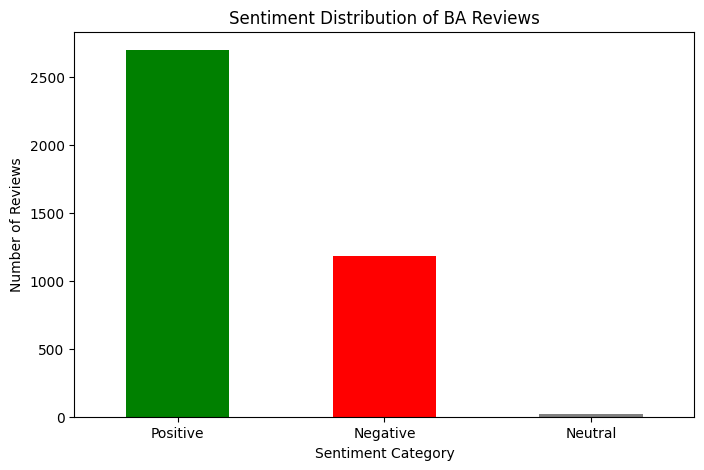

Sentiment analysis completed and saved.


In [3]:
from textblob import TextBlob
import matplotlib.pyplot as plt

# Function to compute sentiment polarity
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

# Apply sentiment analysis
df["sentiment"] = df["reviews"].apply(get_sentiment)

# Classify sentiment into categories
df["sentiment_category"] = df["sentiment"].apply(lambda x: "Positive" if x > 0 else "Negative" if x < 0 else "Neutral")

# Display sentiment distribution
sentiment_counts = df["sentiment_category"].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind="bar", color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution of BA Reviews")
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.show()

# Save the sentiment results
df.to_csv("BA_reviews_with_sentiment.csv", index=False)
print("Sentiment analysis completed and saved.")


 Generating a WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/muhammadjon/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


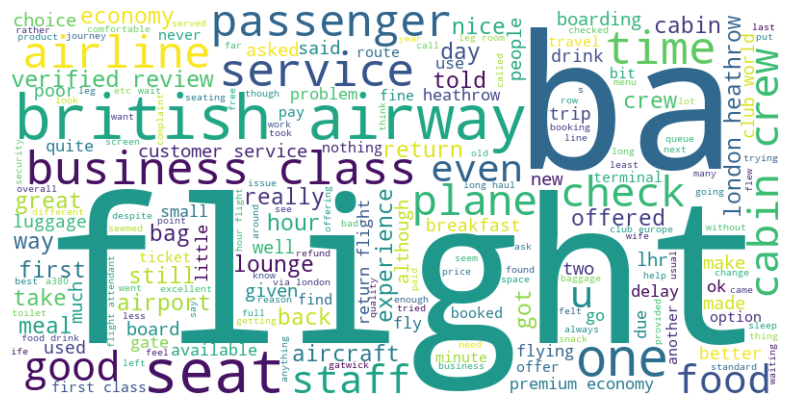

In [4]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string

# Download stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Combine all reviews into a single text
text = " ".join(df["reviews"].dropna())

# Remove punctuation and stopwords
cleaned_text = " ".join([word for word in text.split() if word.lower() not in stop_words and word not in string.punctuation])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(cleaned_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


Topic Modeling using LDA (Latent Dirichlet Allocation)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert text into a matrix of token counts
vectorizer = CountVectorizer(stop_words="english", max_features=1000)
text_matrix = vectorizer.fit_transform(df["reviews"].dropna())

lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  # Extract 5 topics
lda_model.fit(text_matrix)

# Display the top words in each topic
words = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda_model.components_):
    print(f"\nTopic {topic_idx+1}:")
    print(" ".join([words[i] for i in topic.argsort()[-10:]]))  # Show top 10 words per topic



Topic 1:
seats british served service seat cabin meal crew food flight

Topic 2:
airport service customer london hours told airways british ba flight

Topic 3:
economy british service airways flight seats seat business class ba

Topic 4:
seats cabin service crew seat food club ba flight good

Topic 5:
minutes cabin heathrow good ba check boarding crew time flight
